# Laboratorio 01

Universidad del Valle de Guatemala, Visión por Computadora, 2025
Realizado por Diego Morales, Angel Castellanos, Alejandro Azurdia


In [9]:
import numpy as np

import matplotlib.pyplot as plt
import skimage as ski
from PIL import Image

from sklearn.cluster import k_means

## 1. Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).

Mostrar a través de ejemplos la imagen original y la imagen ecualizada. Mostrar también los histogramas normalizados y su distribución acumulada de ambas imágenes. Comparar los resultados de su función contra alguna función ya predefinida en Python para calcular ecualizaciones. Por ejemplo, en scikit-image, tenemos la función skimage.exposure.equalize hist; o en OpenCV, tenemos la función cv2.equalizeHist. ¿Son iguales sus resultados con los de la función de Python? Explique por qué son iguales o explique por qué hay diferencias.

Version con SKimage

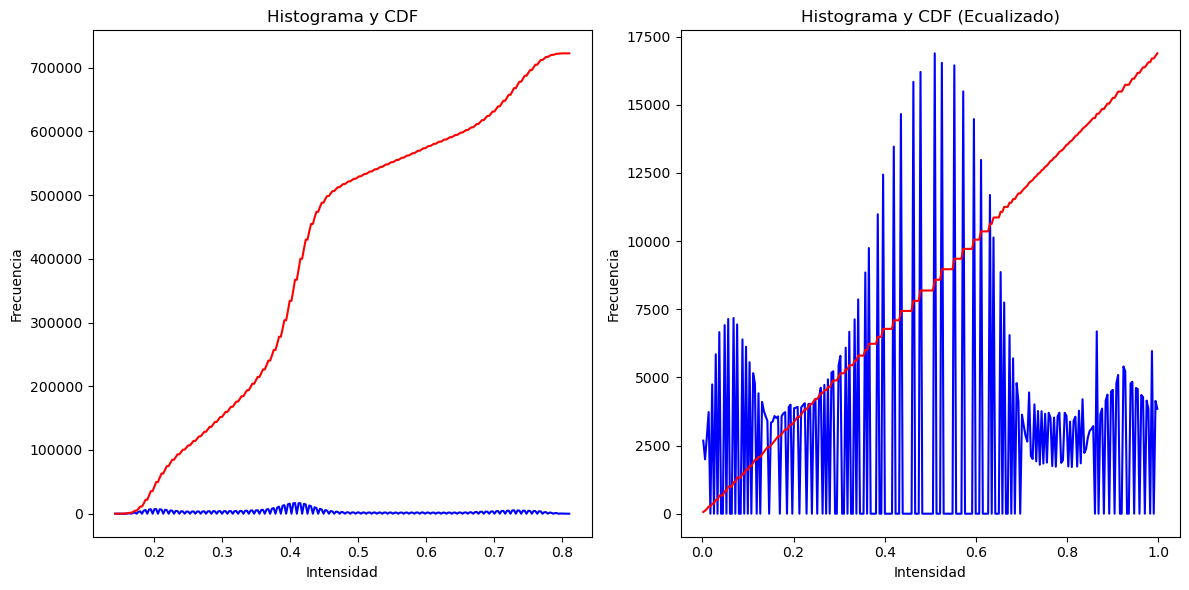

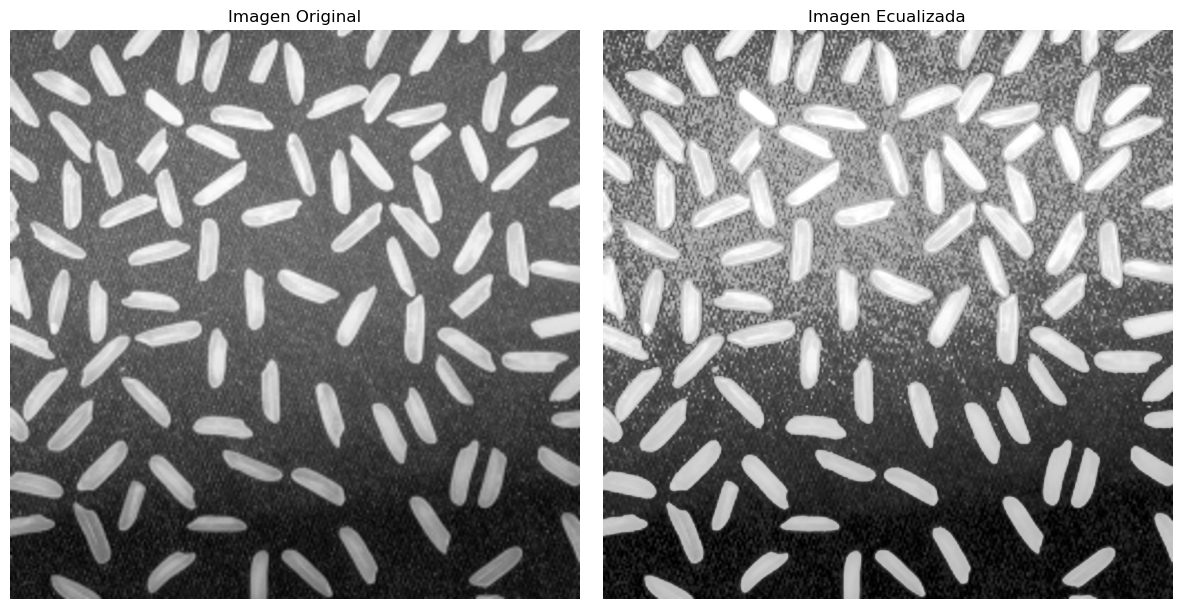

In [26]:
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float, io

# Cargar una imagen de ejemplo
image = img_as_float(io.imread("img/rice.jpg", as_gray=True))

# Calcular el histograma y la CDF usando skimage
hist, hist_centers = exposure.histogram(image)
cdf = hist.cumsum()

# Mostrar el histograma y la CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_centers, hist, color='blue')
plt.plot(hist_centers, cdf, color='red')
plt.title('Histograma y CDF')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

# Ecualización del histograma
image_eq = exposure.equalize_hist(image)

# Calcular el histograma y la CDF de la imagen ecualizada usando skimage
hist_eq, hist_centers_eq = exposure.histogram(image_eq)
cdf_eq = hist_eq.cumsum()
cdf = cdf_eq * hist_eq.max() / cdf_eq.max()

# Mostrar el histograma y la CDF de la imagen ecualizada
plt.subplot(1, 2, 2)
plt.plot(hist_centers_eq, hist_eq, color='blue')
plt.plot(hist_centers_eq, cdf, color='red')
plt.title('Histograma y CDF (Ecualizado)')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_eq, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

plt.tight_layout()
plt.show()

Version manual

In [ ]:
# Cargar una imagen en escala de grises

img = Image.open("img/rice.jpg").convert("L")

# Calcular el histograma y la CDF usando np.histogram

hist, bins = np.histogram(img, bins=256, range=(0, 256))
cdf = hist.cumsum()


# 3 Implementar un algoritmo de segmentación para imágenes RGB
Para poder ejecutar el siguiente código es necesario tener instalado:
- OpenCV (cv2)
- NumPy
- Matplotlib
- scikit-learn (KMeans)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def segmentar_imagen(imagen, k):
    alto, ancho, canales = imagen.shape
    pixels = imagen.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    centros = kmeans.cluster_centers_
    
    labels_img = labels.reshape(alto, ancho)
    
    imagen_cuantizada = centros[labels].reshape(alto, ancho, 3).astype(np.uint8)
    
    return labels_img, imagen_cuantizada

In [3]:
def mostrar_resultados(imagen_original, mapa_segmentos, imagen_cuantizada, titulo_extra=""):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(imagen_original)
    plt.title("Imagen Original" + titulo_extra)
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(mapa_segmentos, cmap="viridis")
    plt.title("Mapa de Segmentos")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(imagen_cuantizada)
    plt.title("Imagen Cuantizada")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

In [15]:
def RGBKmeans(imagen, k):
    imagenes = {
        '1': './imagenes/fachada.jpg',
        '2': './imagenes/gradiente.jpg',
        '3': './imagenes/pixelart.jpg',
        '4': './imagenes/solidos.jpg',
    }
    imagen = str(imagen)
    ruta_imagen = imagenes.get(imagen)
    
    if k < 2:
        print("El valor de k debe ser mayor o igual a 2.")
        return
    
    imagen_bgr = cv2.imread(ruta_imagen)
    if imagen_bgr is None:
        print("No se pudo cargar la imagen. Verifica la ruta.")
        return
    imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
    
    mapa_segmentos, imagen_cuantizada = segmentar_imagen(imagen_rgb, k)
    
    mostrar_resultados(imagen_rgb, mapa_segmentos, imagen_cuantizada)

## Ejemplos Buenos

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


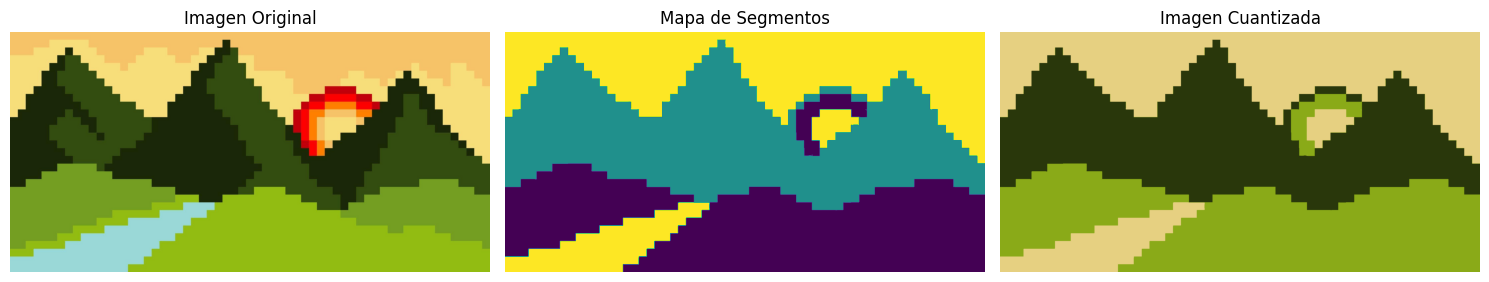

In [25]:
RGBKmeans(3, 3)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


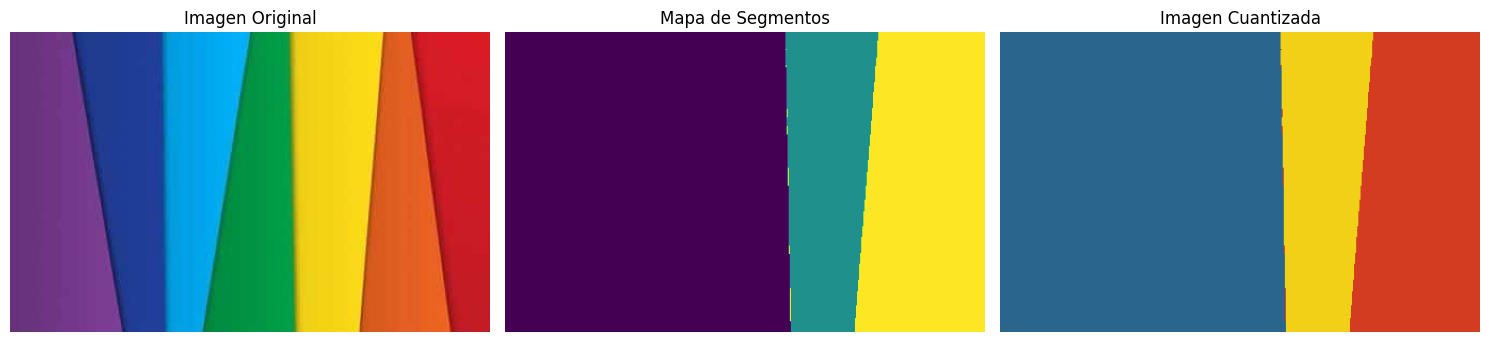

In [26]:
RGBKmeans(4, 3)

## Ejemplos Malos

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


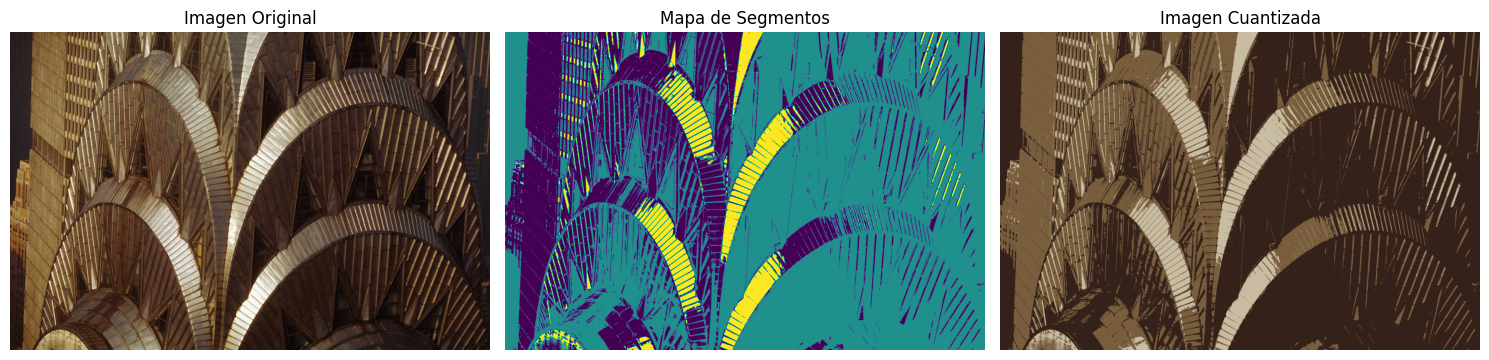

In [27]:
RGBKmeans(1, 3)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


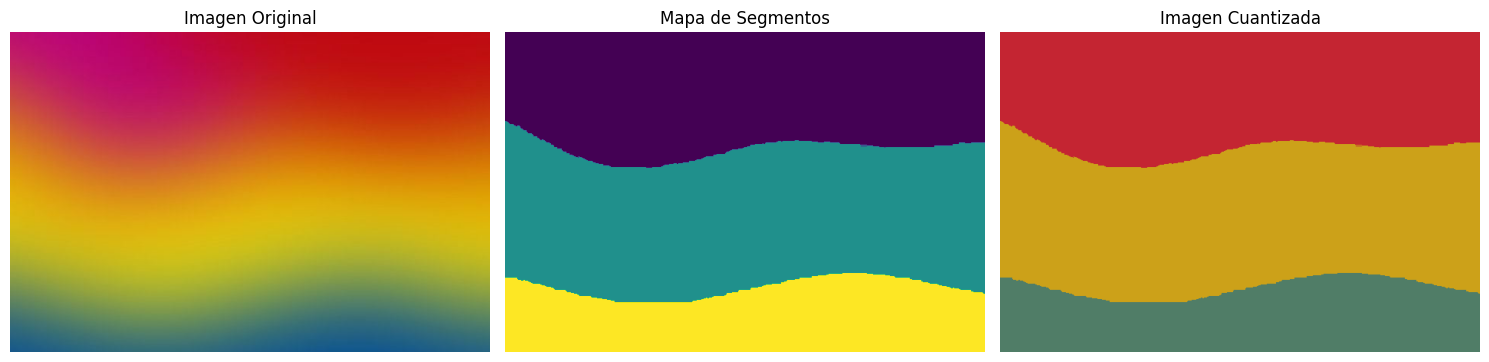

In [28]:
RGBKmeans(2, 3)

En los primeros dos ejemplos (“buenos”) se aprecia que el algoritmo funciona adecuadamente cuando la imagen presenta regiones de color bien definidas y límites claros entre ellas. El mapa de segmentos muestra separaciones consistentes y la imagen cuantizada reproduce fielmente los colores predominantes en cada zona, reflejando la capacidad de k-means para agrupar con éxito los píxeles que tienen tonalidades similares. No obstante, el hecho de haber elegido k = 3 implica que la imagen se divida únicamente en tres zonas, lo que puede agrupar en un mismo segmento matices que tal vez, con un valor de k mayor, habrían quedado separados.

En contraste, en las dos últimas imágenes (“malas”) se notan las limitaciones de k-means ante gradientes suaves o texturas muy complejas. El algoritmo tiende a forzar fronteras donde no existen transiciones abruptas de color, generando divisiones que no siempre coinciden con la percepción humana. Además, al usar un número fijo de tres segmentos, se restringe la capacidad de representar variaciones más sutiles, obligando a que toda la imagen quede encuadrada dentro de esas tres categorías cromáticas.

# 4  Pepsi y Cocacola

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def show_hue_histogram(image_path, title):
    img_bgr = cv2.imread(image_path)
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    
    H = img_hsv[:, :, 0]
    
    hist_H = cv2.calcHist([H], [0], None, [180], [0, 180])
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Imagen original (RGB)")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.plot(hist_H, color='blue')
    plt.title(f"Histograma de Matiz - {title}")
    plt.xlabel("Valores de H (Hue)")
    plt.ylabel("Frecuencia")
    plt.xlim([0, 180])
    
    plt.tight_layout()
    plt.show()


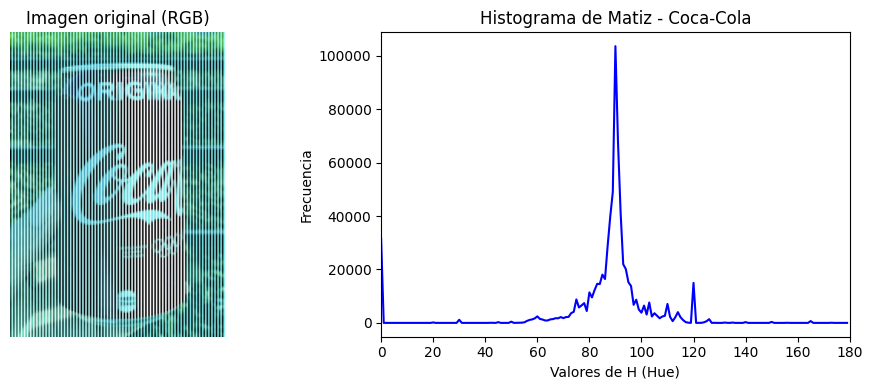

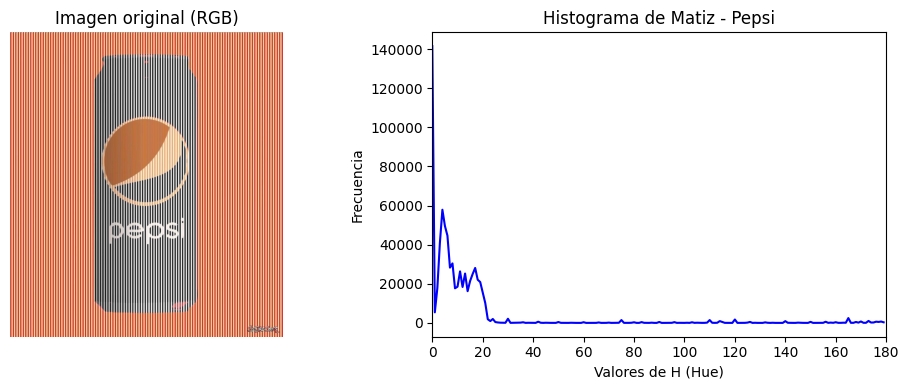

: 

In [39]:
ruta_coca = "./imagenes/coca-cola.jpeg"
ruta_pepsi = "./imagenes/pepsi.png"

show_hue_histogram(ruta_coca, "Coca-Cola")
show_hue_histogram(ruta_pepsi, "Pepsi")

La primera imagen, asociada con Coca-Cola, exhibe en su histograma una clara concentración de matices en la región del cian, lo que sugiere que la lata se desplaza hacia tonalidades verde-azuladas. Sin embargo, al contemplarla, tiende a interpretarse como roja gracias a la presencia del logotipo y la forma distintiva que la caracterizan. Esta disonancia entre lo que reflejan los datos objetivos y la percepción surge porque la experiencia previa y la asociación cognitiva llevan a corregir la señal cromática, de modo que se preserve el color tradicional esperado.

La segunda imagen, vinculada a Pepsi, presenta un pico notable en los rangos de naranja, aunque la impresión general apunta a que domina el azul. De nuevo, la referencia cultural y la familiaridad con el producto desempeñan un papel crucial: la forma de la lata y el diseño del emblema generan la expectativa de un tono azul, que termina “enmascarando” los valores reales de matiz. Esta convergencia entre la memoria visual y la interpretación subjetiva de la realidad evidencia cómo la información previa puede sobreponerse a la evidencia cromática que ofrecen los datos.